En este Cuaderno se Realiza el Preproceso de seleccion de datos de la Base de Datos de Demanda Comercial de Energia Electrica en Colombia, Obtenida del Repositorio Publico de XM

[Sitio Web XM](https://www.xm.com.co/)


[Repositorio github de XM](https://github.com/EquipoAnaliticaXM)

# Carga de Librerias

In [1]:
import datetime as dt           # Permite trabajar con fechas 
import pandas as pd             # Manipulacion de datos
import matplotlib.pyplot as plt # Grafica de Datos
import numpy as np              # Manipulacion numerica matematica
from google.colab import files  # Permite descargar archivos directamente desde Colab

In [2]:
# ignorar algunos mensajes de error
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [3]:
#cargar datos desde Google drive acceso libre
FILEID = "13P78Bt1OlKPzvgtWPvLWa_TKMdpMwvG0"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Demanda_Col.zip && rm -rf /tmp/cookies.txt
!unzip Demanda_Col.zip
!dir

--2023-05-11 18:34:49--  https://docs.google.com/uc?export=download&confirm=t&id=13P78Bt1OlKPzvgtWPvLWa_TKMdpMwvG0
Resolving docs.google.com (docs.google.com)... 142.251.163.139, 142.251.163.138, 142.251.163.100, ...
Connecting to docs.google.com (docs.google.com)|142.251.163.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7ca1hhmq6kpqoukc37vg4ntcc47q9uh3/1683830025000/15940467605774616319/*/13P78Bt1OlKPzvgtWPvLWa_TKMdpMwvG0?e=download&uuid=071aa393-4928-43e6-a8ff-5dca412e8285 [following]
--2023-05-11 18:34:49--  https://doc-10-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7ca1hhmq6kpqoukc37vg4ntcc47q9uh3/1683830025000/15940467605774616319/*/13P78Bt1OlKPzvgtWPvLWa_TKMdpMwvG0?e=download&uuid=071aa393-4928-43e6-a8ff-5dca412e8285
Resolving doc-10-6k-docs.googleusercontent.com (doc-10-6k-docs.googleusercontent.com)... 142.251.16.1

# Visualizacion Base de Datos

In [8]:
# Asignacion a la varible 'Colombia' la base de datos Cargada
Colombia=pd.read_excel('/content/Demanda_Horaria_Colombia.xlsx')
Colombia = Colombia.drop('demanda_diaria', axis=1)

In [9]:
# Visualizacion General de Base de Datos.
Colombia.head(-5)

,Id,Values_code,Values_MarketType,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,MercadoComercializacion,ANTIOQUIA,REGULADO,357139.75,321497.15,264043.47,232526.30,214121.08,213263.67,237117.01,...,310284.57,319574.14,352031.59,487028.24,506865.85,455885.94,381979.36,296305.13,224074.73,2000-01-01
1,MercadoComercializacion,BAJO PUTUMAYO,REGULADO,3022.90,2748.13,2392.26,2206.90,2052.37,1935.34,1780.05,...,1728.80,1790.13,1994.67,3461.30,3591.46,3051.96,2416.58,1934.68,1758.97,2000-01-01
2,MercadoComercializacion,BOGOTA - CUNDINAMARCA,REGULADO,841638.11,735376.10,630084.50,564682.66,527684.26,505298.44,439457.55,...,508672.06,493913.18,539297.07,809570.95,906968.70,862213.35,766537.57,622094.45,519659.56,2000-01-01
3,MercadoComercializacion,BOYACA,REGULADO,105568.19,93993.04,79651.53,71798.32,66068.95,63256.82,58432.48,...,53200.08,49182.69,60028.61,99842.23,123027.47,103387.44,62221.09,108287.87,59025.44,2000-01-01
4,MercadoComercializacion,CALDAS,REGULADO,97421.74,69978.97,73762.40,55820.44,52190.99,49818.91,50151.64,...,57366.87,56268.65,73813.85,137702.69,143324.61,128582.14,93323.38,67538.00,49072.66,2000-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305018,MercadoComercializacion,RUITOQUE,REGULADO,1458.72,1388.66,1354.60,1334.97,1309.26,1273.26,1214.83,...,1482.92,1488.79,1573.17,2047.69,2095.44,2035.78,1935.34,1845.00,1784.62,2022-12-31
305019,MercadoComercializacion,SANTANDER,NO REGULADO,128108.54,128063.09,124435.06,117311.03,118506.87,117631.65,116690.88,...,118848.63,117000.73,116620.10,116534.13,114594.52,111053.14,108248.04,107398.86,106475.62,2022-12-31
305020,MercadoComercializacion,SANTANDER,REGULADO,249582.96,236260.01,226682.87,219061.78,216942.85,218435.89,211118.25,...,282605.26,279930.60,285115.11,326667.31,326143.14,309308.99,286339.38,265128.96,249541.33,2022-12-31
305021,MercadoComercializacion,TOLIMA,NO REGULADO,42126.22,41667.18,41768.73,41607.61,41223.91,40990.97,31957.69,...,34702.14,35511.42,33834.49,42894.90,43650.27,42052.83,40553.78,39377.66,38887.26,2022-12-31


In [10]:
# Visualizacion de Informacion General de la Base de Datos
Colombia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305028 entries, 0 to 305027
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Id                 305028 non-null  object        
 1   Values_code        305028 non-null  object        
 2   Values_MarketType  305028 non-null  object        
 3   Values_Hour01      304068 non-null  float64       
 4   Values_Hour02      304091 non-null  float64       
 5   Values_Hour03      304055 non-null  float64       
 6   Values_Hour04      304042 non-null  float64       
 7   Values_Hour05      304116 non-null  float64       
 8   Values_Hour06      304118 non-null  float64       
 9   Values_Hour07      304047 non-null  float64       
 10  Values_Hour08      303950 non-null  float64       
 11  Values_Hour09      303934 non-null  float64       
 12  Values_Hour10      303883 non-null  float64       
 13  Values_Hour11      303897 non-null  float64 

# Preproceso y Formato de Informacion para Calculo de Demanda Comercial Total de Colombia, Periodo Enero 2000-Diciembre 2022

In [11]:
# Se genera una Copia de la Base de Datos en la Variable 'a'
a=Colombia.copy()
# Se Guarda en la Variable 'b' los nombre de las Columnas de las base de datos
b=a.keys()
print(b)

Index(['Id', 'Values_code', 'Values_MarketType', 'Values_Hour01',
       'Values_Hour02', 'Values_Hour03', 'Values_Hour04', 'Values_Hour05',
       'Values_Hour06', 'Values_Hour07', 'Values_Hour08', 'Values_Hour09',
       'Values_Hour10', 'Values_Hour11', 'Values_Hour12', 'Values_Hour13',
       'Values_Hour14', 'Values_Hour15', 'Values_Hour16', 'Values_Hour17',
       'Values_Hour18', 'Values_Hour19', 'Values_Hour20', 'Values_Hour21',
       'Values_Hour22', 'Values_Hour23', 'Values_Hour24', 'Date'],
      dtype='object')


In [12]:
# Se procede a filtrar la demanda para cada hora del dia
# desde 'Values_Hour01' hasta 'Values_Hour24'
# y se totaliza la demanda de energia de las regiones comerciales
# Clasificadas (Values_code)
d=pd.DataFrame()
for i in range(3,27):
  C = a.groupby(by=['Date']).sum()[b[i]]
  C = pd.DataFrame(C)
  d[b[i]]=C[b[i]] 
# Visualizacion de Variable 'd'
d.head()

,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,Values_Hour09,Values_Hour10,...,Values_Hour15,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,4524870.45,4194491.52,3768572.52,3474891.84,3275226.20,3183128.92,2922908.66,2954433.91,3149337.37,3320769.73,...,3168869.91,3050634.54,3068886.47,3423698.62,4919599.16,5290199.51,4963491.10,4409053.91,3779929.71,3290267.44
2000-01-02,2999982.30,2860092.95,2794236.77,2757657.19,2785729.22,2921677.16,2960904.88,3232251.23,3563458.41,3765830.57,...,3476072.46,3337649.49,3345422.86,3674608.01,5324761.98,5696978.42,5414215.50,4858651.02,4088797.22,3492978.40
2000-01-03,3131733.03,2971008.58,2914154.38,2931090.61,3108334.44,3458773.85,3760914.46,4161595.74,4562436.45,4716935.05,...,4527735.40,4463015.36,4517031.75,4842667.94,6321972.71,6561305.66,6081588.86,5351397.82,4368040.03,3652827.35
2000-01-04,3319586.90,3194972.04,3121538.25,3140405.34,3349509.34,3739904.32,4082246.02,4427765.89,4753058.93,4866677.16,...,4593019.26,4551130.08,4601060.34,4923409.80,6337437.90,6619746.52,6148928.68,5404735.27,4396546.08,3663509.35
2000-01-05,3335303.55,3210616.23,3152782.67,3174835.02,3370963.22,3777419.49,4116889.84,4466925.40,4715363.56,4857347.25,...,4577404.16,4545986.23,4586219.05,4891840.57,6341233.90,6541976.67,6088448.19,5382098.13,4404665.88,3660737.68


In [13]:
# Visualizacion de Informacion General del Data.Frame 'd' con la demanda comercial horaria totalizada
d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8401 entries, 2000-01-01 to 2022-12-31
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Values_Hour01  8401 non-null   float64
 1   Values_Hour02  8401 non-null   float64
 2   Values_Hour03  8401 non-null   float64
 3   Values_Hour04  8401 non-null   float64
 4   Values_Hour05  8401 non-null   float64
 5   Values_Hour06  8401 non-null   float64
 6   Values_Hour07  8401 non-null   float64
 7   Values_Hour08  8401 non-null   float64
 8   Values_Hour09  8401 non-null   float64
 9   Values_Hour10  8401 non-null   float64
 10  Values_Hour11  8401 non-null   float64
 11  Values_Hour12  8401 non-null   float64
 12  Values_Hour13  8401 non-null   float64
 13  Values_Hour14  8401 non-null   float64
 14  Values_Hour15  8401 non-null   float64
 15  Values_Hour16  8401 non-null   float64
 16  Values_Hour17  8401 non-null   float64
 17  Values_Hour18  8401 non-null   flo

In [14]:
# Se procede a concardenar en una sola columna la demanda comercial horaria total en Colombia
# Se toman solo los valores del DataFrame 'd'
e=d.values
print('Tamaño Origial:',e.shape)
print('--------------------------')
# Se calcula en total de datos en la variable 'e'
f=e.shape[0]*e.shape[1]
# Se realiza el cambio tamaño de la variable 'e' para dejar una unica columna
g=e.reshape(f,1)
print('Tamaño Final:',g.shape)
# Damos nombre a la demanda totalizada
i=pd.DataFrame(g,columns=["Colombia"])
# Generamos un Data.Frame en el rango de fechas y horario originales.
date_rng = pd.date_range(start='2000-01-01', end='2023-01-01', freq='H')
# Establece el índice del DataFrame a las fechas generadas
i.set_index(date_rng[0:-1], inplace=True)
# Se visualiza en Resultado del Data Frame
i.head(-1)

Tamaño Origial: (8401, 24)
--------------------------
Tamaño Final: (201624, 1)


,Colombia
2000-01-01 00:00:00,4524870.45
2000-01-01 01:00:00,4194491.52
2000-01-01 02:00:00,3768572.52
2000-01-01 03:00:00,3474891.84
2000-01-01 04:00:00,3275226.20
...,...
2022-12-31 18:00:00,8923913.77
2022-12-31 19:00:00,8908315.14
2022-12-31 20:00:00,8523440.52
2022-12-31 21:00:00,8065376.64


<Axes: title={'center': 'Demanda Energia Horaria en Colombia kWh'}, xlabel='Fecha', ylabel='kWh'>

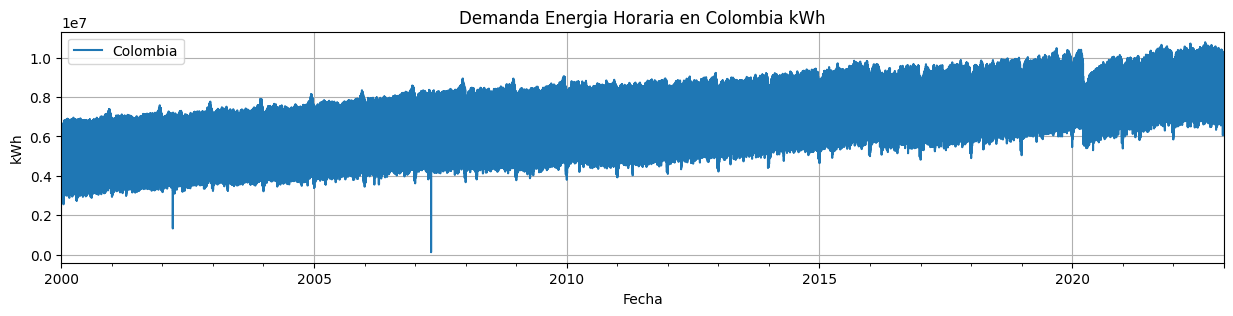

In [15]:
i.plot(kind='line',figsize=(15,3),title='Demanda Energia Horaria en Colombia kWh', grid=True, ylabel='kWh', xlabel='Fecha')

<Axes: title={'center': 'Demanda Energia Horaria en Colombia kWh'}, xlabel='Fecha', ylabel='kWh'>

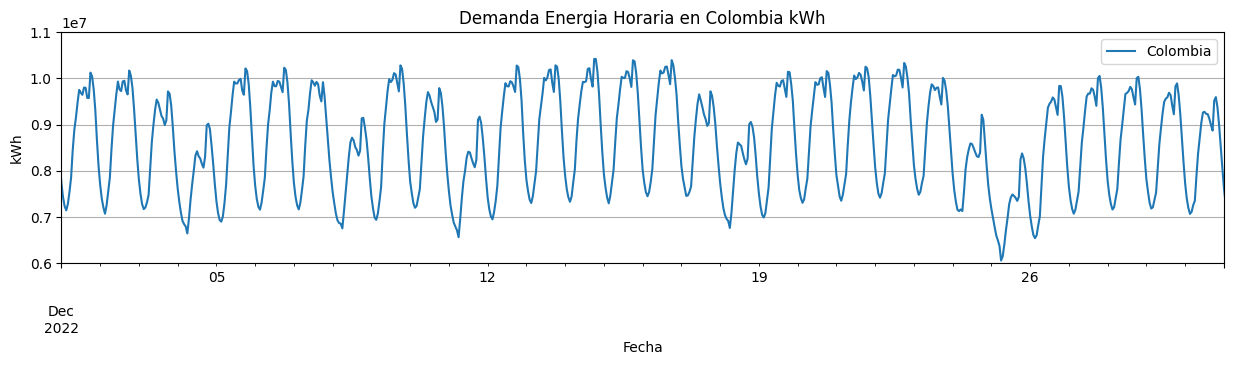

In [16]:
i.plot(kind='line',figsize=(15,3),title='Demanda Energia Horaria en Colombia kWh', grid=True, ylabel='kWh', xlabel='Fecha',xlim=('2022-12-01','2022-12-31'),ylim=(0.6e7,1.1e7))

In [18]:
# Creamos archivo en excel con la base de datos preprocesada
i.to_excel("/content/Demanda_Horaria_Colombia.xlsx")
print('Base de Datos Demanda Colombiana Guardada')

Base de Datos Demanda Colombiana Guardada


In [17]:
# Se descarga de forma automatica el Archivo creado
files.download("/content/Demanda_Horaria_Colombia.xlsx") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Preproceso y Formato de Informacion para Calculo de Demanda Total de Colombia Discriminada por Region Comercial, Periodo Enero 2000-Diciembre 2022

In [19]:
# Se identifican los nombres de cada una de las Regiones Comerciales 
departamentos=Colombia['Values_code'].unique()
print(departamentos)

['ANTIOQUIA' 'BAJO PUTUMAYO' 'BOGOTA - CUNDINAMARCA' 'BOYACA' 'CALDAS'
 'CAQUETA' 'HUILA' 'META' 'NARIÑO' 'NORTE DE SANTANDER' 'PUTUMAYO'
 'QUINDIO' 'SANTANDER' 'SIN CLASIFICAR' 'TULUA' 'VALLE DEL CAUCA'
 'PEREIRA' 'RUITOQUE' 'ARAUCA' 'TOLIMA' 'CHOCO' 'POPAYAN - PURACE'
 'GUAVIARE' 'CASANARE' 'VALLE DEL SIBUNDOY' 'CAUCA'
 'CALI - YUMBO - PUERTO TEJADA' 'CARIBE MAR' 'CARIBE SOL' 'COSTA CARIBE'
 'CARTAGO']


In [20]:
# Se da orden afabetico al nombre de las Regiones Comerciales
departamentos_or=departamentos.tolist()
departamentos_or.sort()
departamentos_or=np.array(departamentos_or)
print(departamentos_or)

['ANTIOQUIA' 'ARAUCA' 'BAJO PUTUMAYO' 'BOGOTA - CUNDINAMARCA' 'BOYACA'
 'CALDAS' 'CALI - YUMBO - PUERTO TEJADA' 'CAQUETA' 'CARIBE MAR'
 'CARIBE SOL' 'CARTAGO' 'CASANARE' 'CAUCA' 'CHOCO' 'COSTA CARIBE'
 'GUAVIARE' 'HUILA' 'META' 'NARIÑO' 'NORTE DE SANTANDER' 'PEREIRA'
 'POPAYAN - PURACE' 'PUTUMAYO' 'QUINDIO' 'RUITOQUE' 'SANTANDER'
 'SIN CLASIFICAR' 'TOLIMA' 'TULUA' 'VALLE DEL CAUCA' 'VALLE DEL SIBUNDOY']


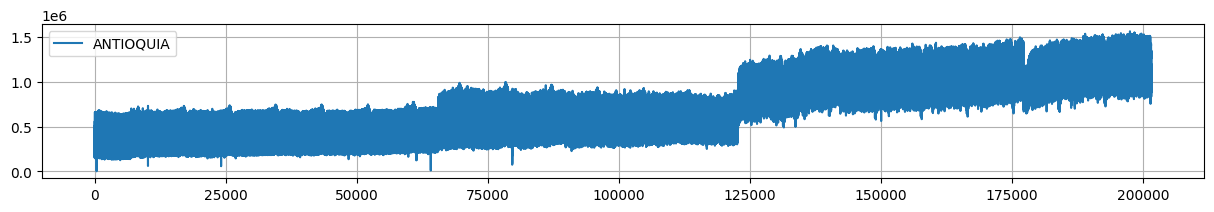

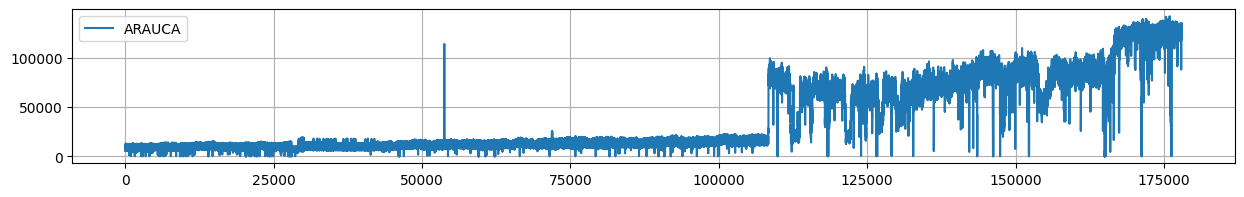

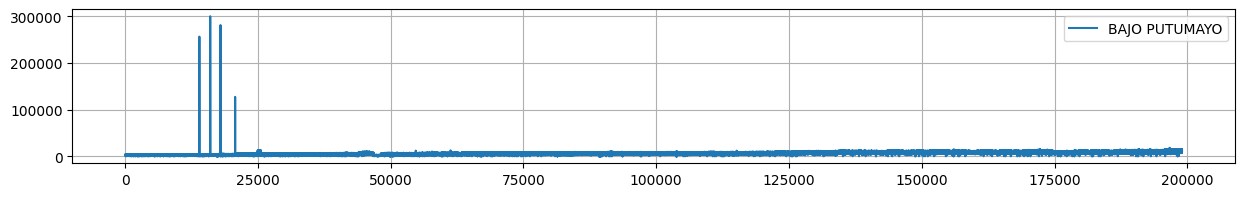

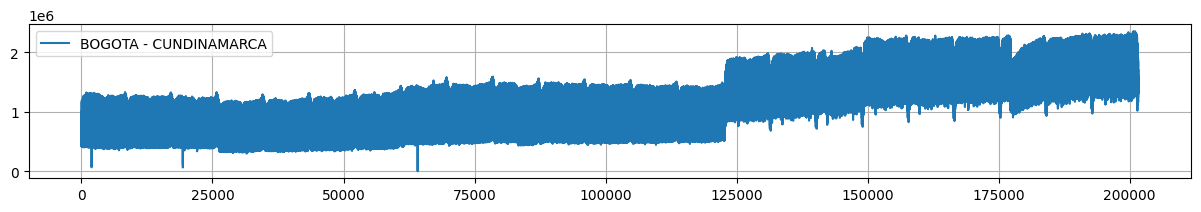

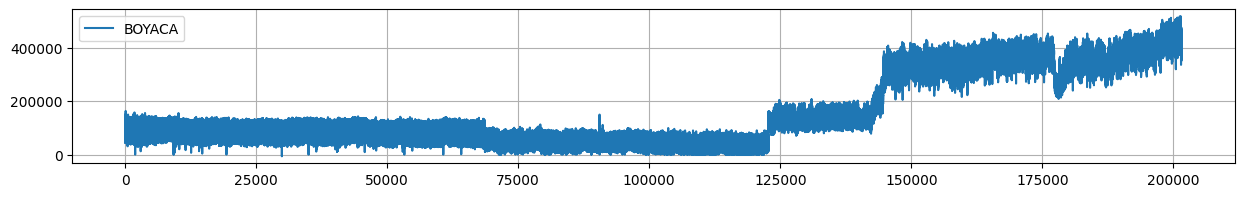

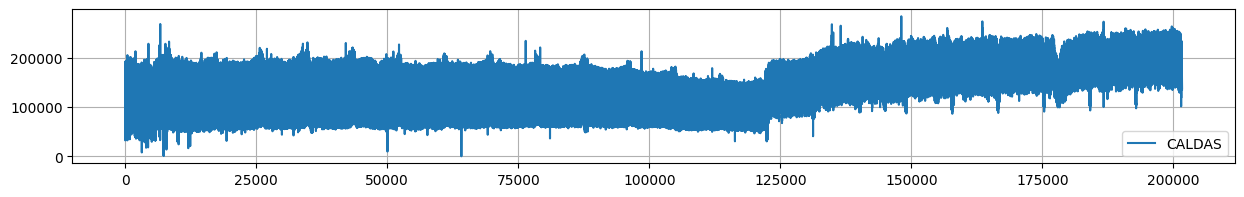

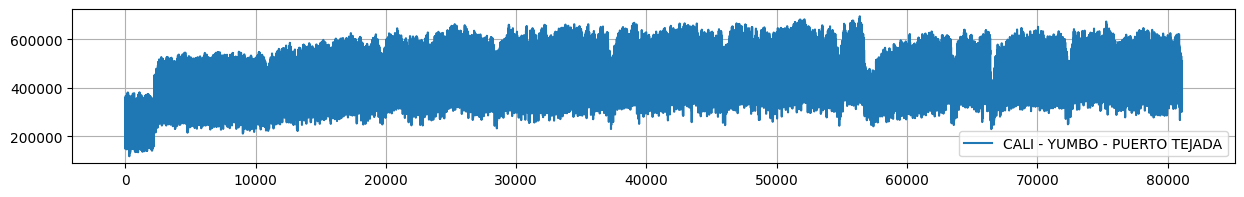

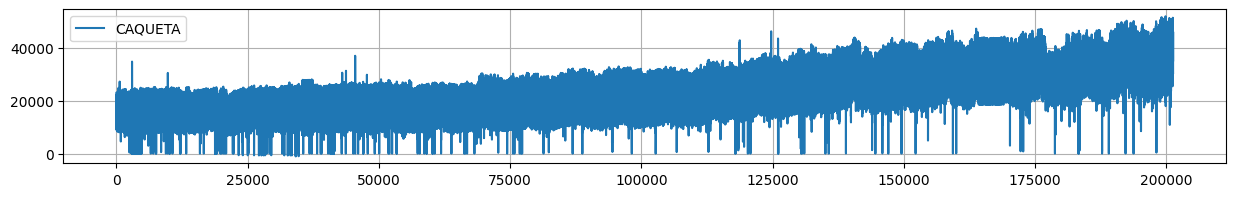

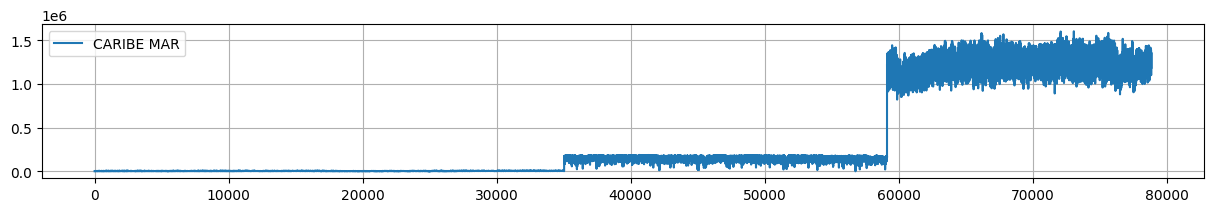

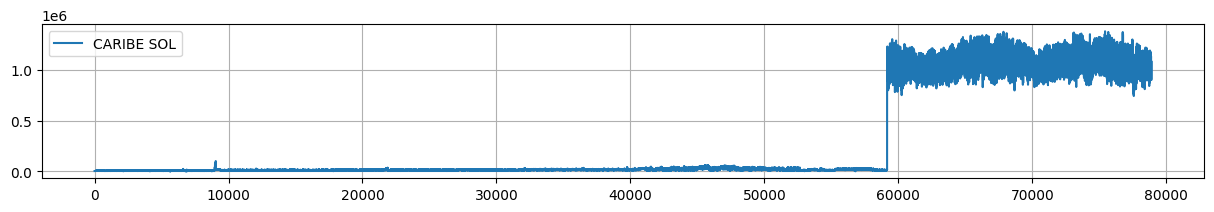

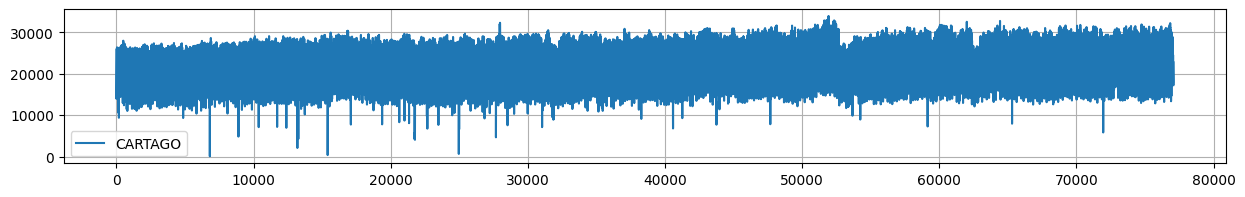

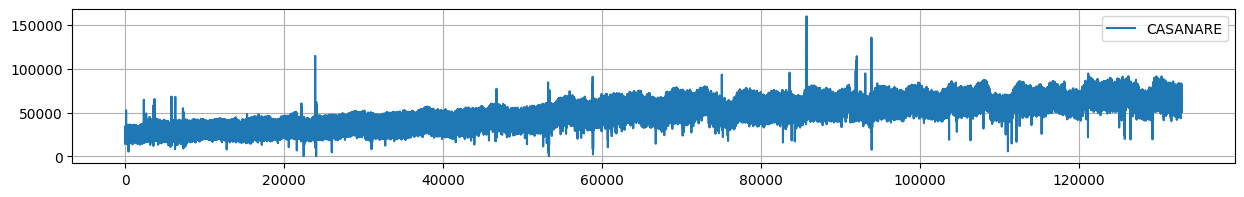

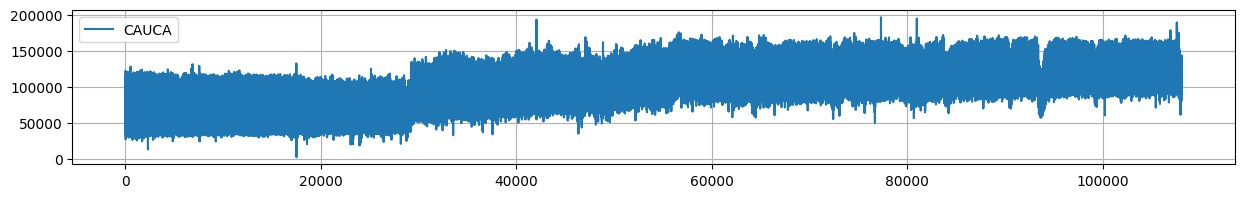

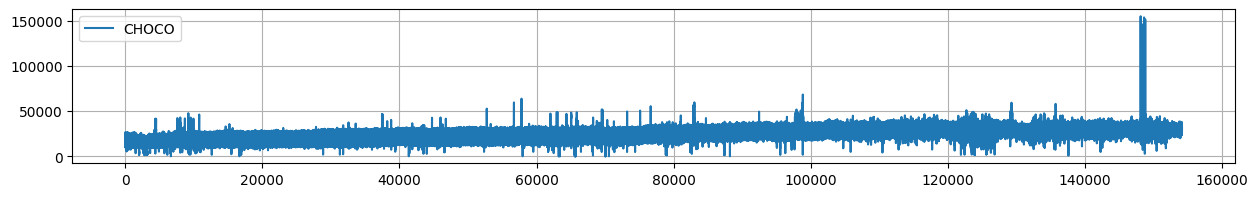

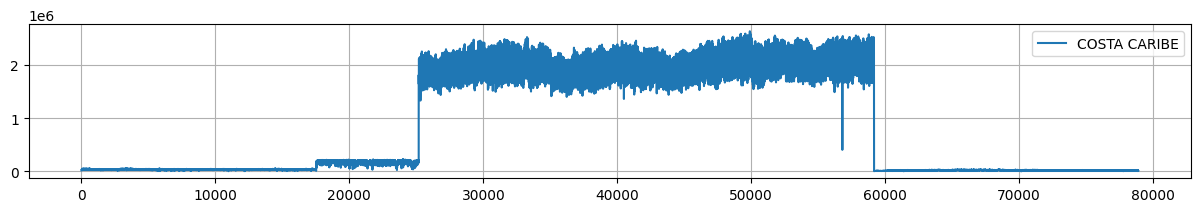

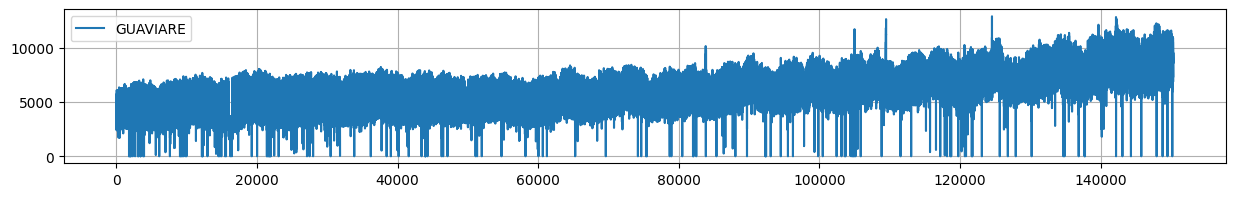

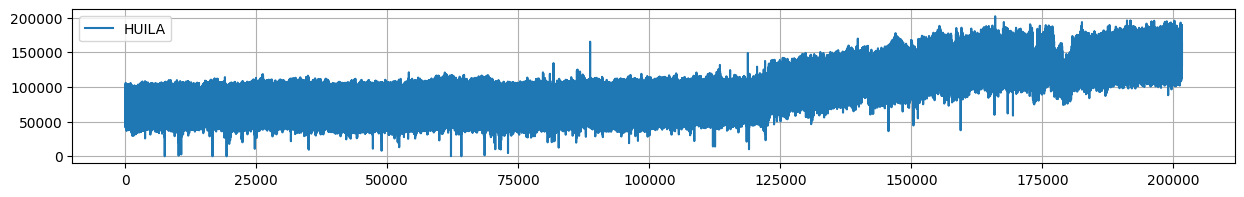

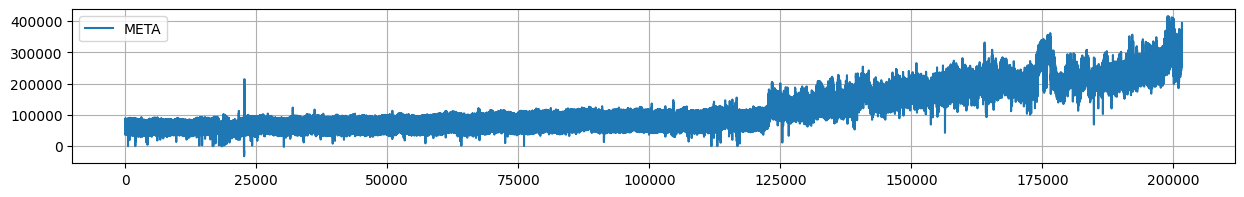

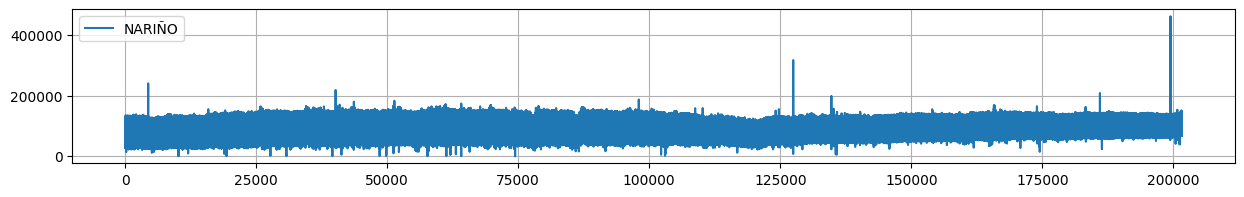

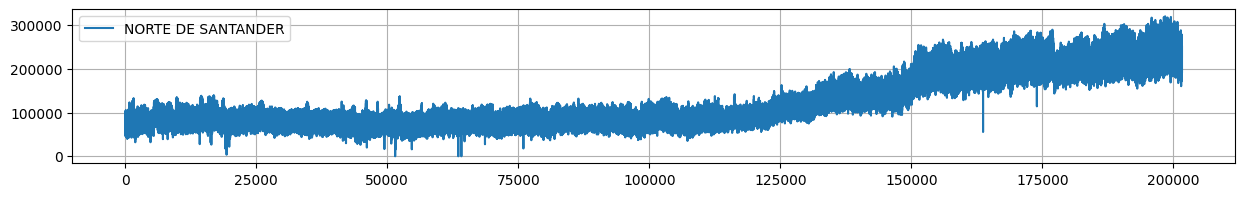

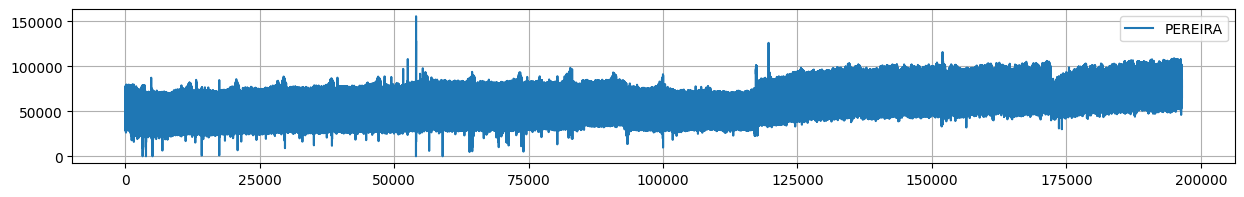

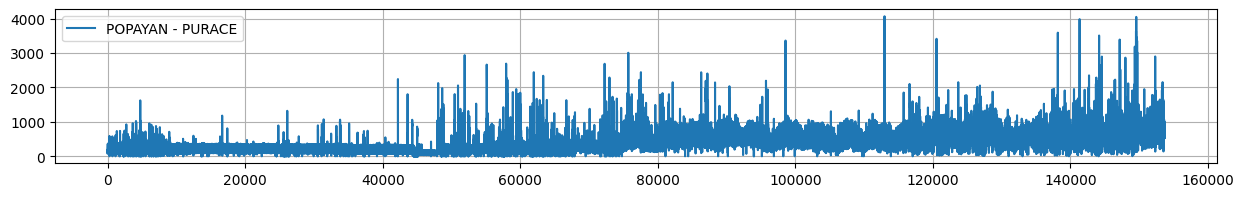

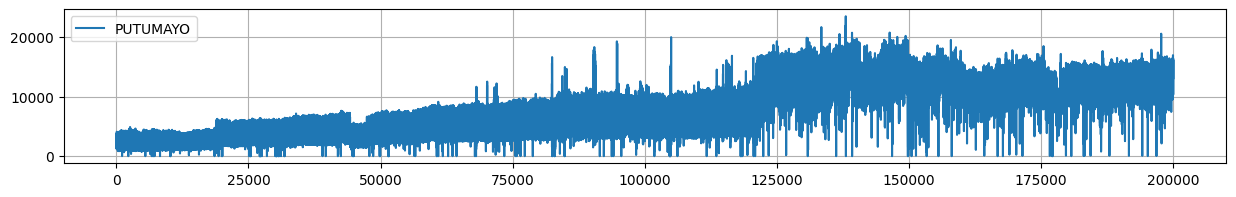

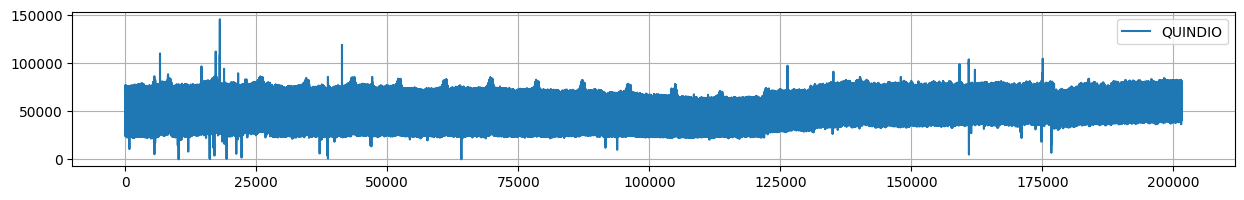

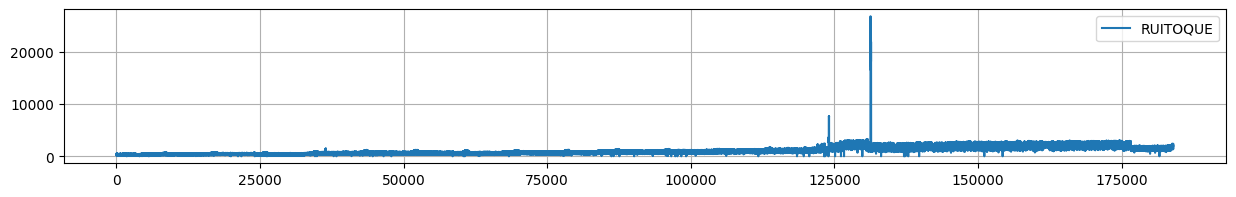

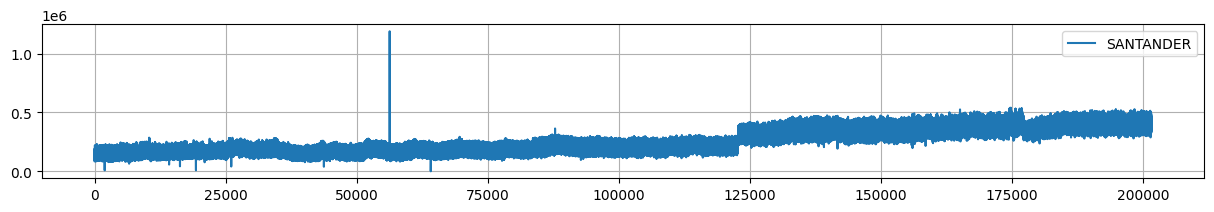

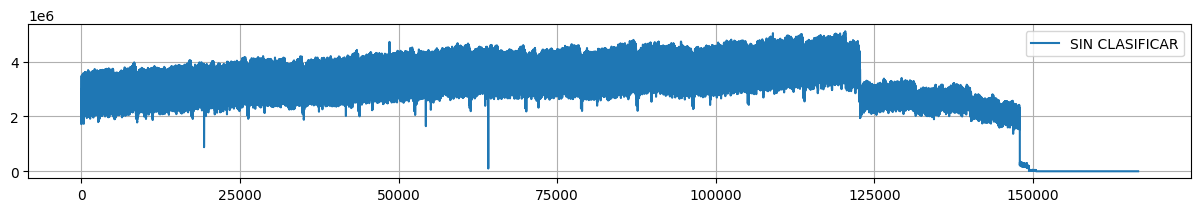

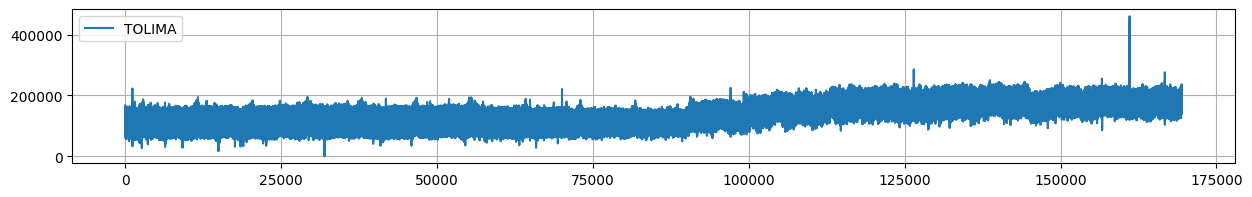

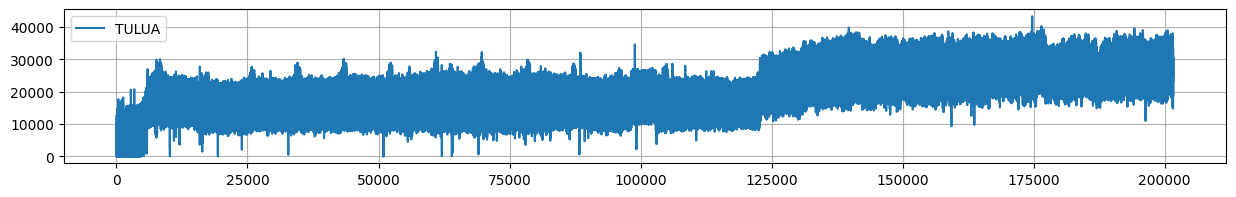

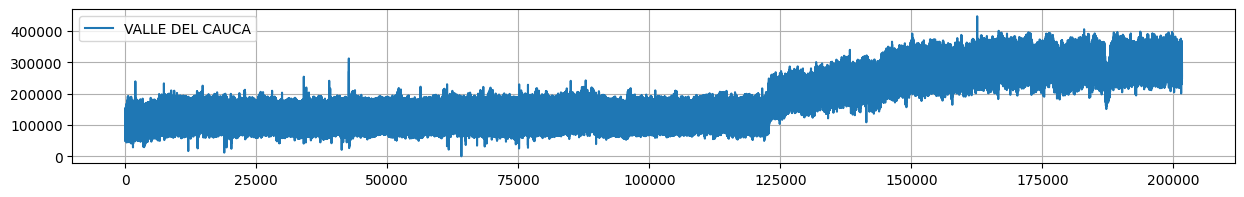

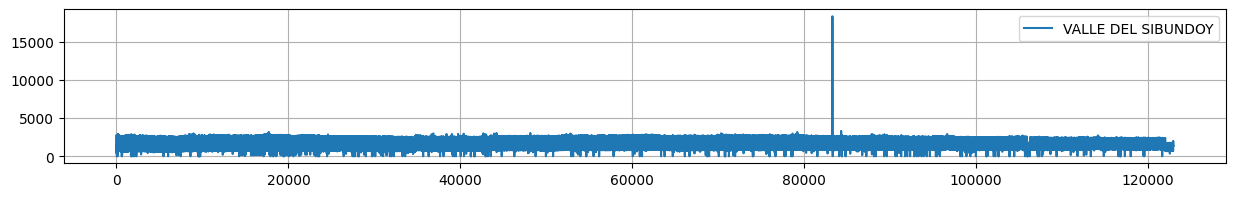

In [21]:
#@title
# Se procede a filtran las demandas horarias de cada una de las regiones comerciales 
# y se genera un archivo de excel por cada una de estas
b=departamentos_or.copy()
for h in range(len(b)):
  c=pd.DataFrame()
  d=Colombia.keys()
  for i in range(3,28): # se filtran las demandas por cada region comercial
    e= Colombia.loc[Colombia["Values_code"] == b[h], d[i]]
    e=pd.DataFrame(e)
    c[d[i]]=e[d[i]]
  cc=c.copy()
  f=cc.keys()
  d=pd.DataFrame()
  for i in range(0,24): # se realiza la suma de las demandas reguladas y no reguladas de la respectiva region comercial
    C = cc.groupby(by=['Date']).sum()[f[i]]
    C = pd.DataFrame(C)
    d[f[i]]=C[f[i]] 
  # Se Transponen la informacion del data frame para poder unirlas en un sola serie.
  df_transposed = d.transpose()
  df_melted2 = pd.melt(df_transposed)
  # Se guarda la demanda energetica del DataFrame en un unico archivo en excel por region comercial
  df_melted2.to_excel("/content/{}.xlsx".format(b[h]))
  # Graficamos Cada de las Demandas por region Comercial
  plt.figure(figsize=(15,2))
  plt.plot(df_melted2['value'],label=b[h])
  plt.legend()
  plt.grid()
  plt.show()
